In [1]:
# Initialize the random number generator
rng = MersenneTwister(2016);

In [2]:
# Size of matrix
n = 16
Q = rand(rng, n, n)
Q, = qr(Q)

Λ = diagm(Float64[1.4^(-i) for i=0:n-1])
Λ[n,n] = 1e-1 * Λ[n,n]

A = Q * Λ / Q

16x16 Array{Float64,2}:
  0.227973     0.166643    0.162037    …   0.05389     -0.0139736 
  0.166643     0.261279    0.129312        0.0397342    0.0400778 
  0.162037     0.129312    0.224327        0.03295      0.0412857 
  0.00297891  -0.0201759   0.0260055       0.00234127   0.00520295
 -0.0115157    0.0125484  -0.00921677      0.0764092    0.0275871 
  0.0159532   -0.0295952   0.0447301   …   0.10858      0.0700198 
  0.141001     0.177755    0.14943         0.0987644    0.0990724 
  0.0587557    0.0350338   0.0213561       0.09593      0.0196911 
  0.0789802    0.0548429   0.0982046       0.0520265    0.0954151 
  0.138705     0.0491052   0.118873        0.14555     -0.0414623 
  0.0361497    0.0156304  -0.00692833  …   0.119504     0.0461919 
 -0.0847394   -0.0233921  -0.0610421       0.142572     0.101279  
 -0.00441918  -0.0733711   0.0452529      -0.0183839    0.00965959
  0.00702074   0.0155854   0.0656713       0.0670086    0.0665951 
  0.05389      0.0397342   0.03295    

In [3]:
Tk = copy(A)
for k=1:10
    Uk, Rk = qr(Tk)
    Tk = Rk * Uk
end

# Print approx. and exact evalues
n_prt = 3
Tkdiag = diag(Tk)
exact = diag(Λ)
println("Tk    ",Tkdiag[1:n_prt])
println("Exact ",exact[1:n_prt])

Tk    [0.9998159459721514,0.7136787168425129,0.5107816401875688]
Exact [1.0,0.7142857142857143,0.5102040816326531]


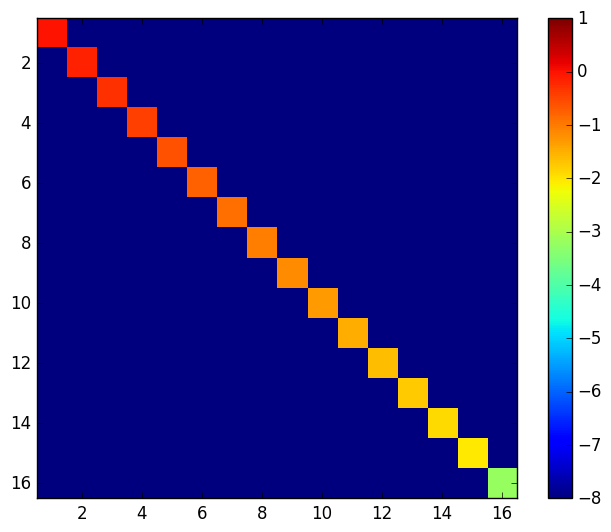

In [4]:
# Create animation for QR iteration
using PyPlot
using PyCall
@pyimport matplotlib.animation as anim

ffmpeg_installed = true

if ffmpeg_installed # && ! isfile("QR_iteration.mp4")

    function record_snapshot(A, ims)
        """Saves figure snapshot for the animation"""
        im = imshow(copy(A), interpolation="nearest",
        extent=(0.5,size(A,1)+0.5,size(A,2)+0.5,0.5))
        clim(-8,1)
        push!(ims, PyCall.PyObject[im])
    end

    fig = figure()
    ims = []

    Tk = copy(A)
    record_snapshot(log(abs(A))/log(10), ims)
    for k=1:70
        Uk, Rk = qr(Tk)
        Tk = Rk * Uk
        record_snapshot(log(abs(Tk))/log(10), ims) # This is used to make the movie
    end
    colorbar()
    ani = anim.ArtistAnimation(fig, ims, interval=100, blit=true)
    ani[:save]("QR_iteration.mp4", extra_args=["-vcodec", "libx264", "-pix_fmt", "yuv420p"])
    
end

In [5]:
# call function to display the animation
if isfile("QR_iteration.mp4") # Checks whether movie file exists
    display("text/html", string("""<video autoplay controls><source src="data:video/x-m4v;base64,""",
        base64encode(open(readbytes,"QR_iteration.mp4")),"""" type="video/mp4"></video>"""));
end

<source src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQACHK9tZGF0AAACrgYF//+q3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE0OCByMjY2OCBmZDJjMzI0IC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAxNiAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTYgbG9va2FoZWFkX3RocmVhZHM9MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTEwIHNjZW5lY3V0PTQwIGludHJhX3JlZnJlc2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAgcXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAA3MWWIhAA///73aJ8Cm1pDeoDklcUl20+B/6tncHyP6QMAAAMAAAMAAAMAAnz5ifHMzMuRR0AAAAMA4AGKIkzZn7B+kb4AdDsVk+hNe5pNyS30hQBB1zEgUa9xNWaTIfSpg4tkYhYgmZdoqXS1AKkcLET/h1GhSqCR+Uq9gVXpE34TjpFYkHd8OoA6ilTeHBL/c2FARttfdLYg1lOae0lPAW/d7jNv4KWTOXxV6vNP0NtRlU5AZKhUoE7RGOcmItEYV1Lk0y9f1lYhJ1GrD6bDg3Nysgpp5lUUdHVwql7xIxwgi/UJN2QXANONtih++RGDQV2mtPuabwvjMg9cd3hEZFgD8Z/Bf8ciAZySFAMgC+9z0vzSZI/VDpY/5a17seLPKM2jJssezRafkvjDtDNUkaekm4S1FiR3ETvst5hKOYVxXwKziOPCiOhtkq7ofR4GQBk4cTHqS/x3oHR6oxXB63ia/T66CEGXtkmowEeGjUMIxgyacGmQME2bG0LHtKTmkTxLxVZQl6M6CwYYIrRJtBs2Q/xgiZjxY4O56wwdUhNMMZune+GcH3ekI9kJoQ09tsI5x4YXkmBfLLeVDne6Wgrz+ocQwlZ+VmGK3QzRKCfrPe86LnrPPSDFalpaA3wrEHSWQ6LRnNqYFE9uS0g/ny34xs/dFtlVh7eAAqXAO9iW28CL0J5GXZdCrzoO02SvZrASFrU3LBpo0IiluU0mUs6sQgw9OMsNYOmrR1E/N/zRM7ibUTfejVIaFTXVxTxbmYMPzS7jzWOARgQJzg71YcNfc9fYz3GnrUqchIDnZ7S+R/I7StY9KQ3YJHnZQI2btGu5IQfUMAqPA8meq3CgDsIvW2m/n46abfr0EC7zw3BGEOtvlCuJsg+rncYpkZ5ML+VLkSc9OCTeLVD0MaoM9I3EYYxknSi+5V35RUDgbdZQH31gewiezKw9SfaNDjnNErg3t1t8X+lfvARZuQreSigs6BU9/if2qfea490cDFYdWvTK/ESiK/LkXzfYNbaUlsRsnEvZb1H0bp6k4oWplFSwYv6CA9oV1BwnpWwrrVqZ/aOD69Ce4V0Uqq1oKDyg5H5R2mOGpZDmbZ2D+00iCck7oCZUUcEm4h3FOYogsGuCJDNswGcA6lonW2j6I+lDllP6SN4SY9OTx1v8RsqerZhQ7UOZdYSbRguxsAC8m7wU7i4xzJ0oquXQQAY0I5H3D9bfo/ahNW9wUoREBJ0APLg75Kx4KqD0TEQcbalngzXHxp9ufUR+xfdBvI46pp1MjJUqe/XxiCmeBBn6the6bgx/OePikoWiYJ3chgqEqC3nj09XoF1h4ZulZRSHN7SlhCeJ87DTJZ7+O6Snuh/TbOoSegFKr1P7OiqwFABCF2cycocHg3lDLkcsgsNfuuN474uAAgUMOfP7VATD2qsFfYBGxGEMHJq4jQBFsUZc+6dIC7ZejfohWgWHC8ra7iUdFZc6ptuBUiy1TDN6MdyYwkBzS2iv/0cmb/AtkjEgLB4/ofiCxsxB2vDZ8g+gPtBO0C37yMd064jlNoLLSp63F7E6TyZvQ+Q2PTgOpRzvYxOey1Y2ts2oRX1j6Es2Ztx794DJPICQq3XTMalBqNXB01lDhgy5i3jOmdrIKj6u50hRy8BrMtMN5kLO1Y8w0ajOw8kIYNGfWTuGFO5Dapdr1zSQr3F69fN2rGRcn0RqVXFUFTY81OpVrNzS/bWN7B/OhdmtE6IQXosrNT4FcpoBDi20hM0UbewwHUl5ACGzdAffcRodUZLrH4Yh1htzZVeq1kKUtL8KbdyEvxw/CO6Yq7PFMLPYM4MqUnBREo9xuQ1VIY13vtKovKUIlg/ZHK8Vj4L7ZFGPadmu9Zt9P0wt2LffDv0V0l2Xc5SKJxoAAAMAejhPEMT9g5Rc7dFif2q6rQkC6gDS+kOyTChvx5lIlrvbG4fgv+pAqLoFRM+xbTt2cj6lGX+r+Bg5JNNmimFh/BHp+bM3Ryc1ioDwMKpyY0Hmz5DJdDFKMnGDteT+39R8sDziz1J0+OoBeSeXgsxxY+YGUIE8LDDjoDWPCssF/afaZ+5ubS/HY4sGGOJfB1SdAOKHQWYw84q7U8yJWJ29j11HIe/r7AH0cC7KT3rPxajCCzueh8qpvZWmYIevuZw/gYzQKOzsDUsSJOh++fd90JOKND6zJWKurPH3cjcifXP4sIp10jpqoY8oBDD3Ko7zEq7WptyvQarBF4cC/n/CIZbxzNNtIClTDFtcr2ve+SDGdRYfslrgMW5ZpAjf1PfDJj8D+MEuaDRYm+4vfM/7NhdscBXNS1WfkMl58Js4zAE6RQXTfVKHTUVnzKyFvjzOS/5g8He0p+Zogv9vVtpevY3iPsd2j5mNBQlnw2LNz5ThMLoUiv+5RmIi3oAgC5KMDK/GekAABvAU0XxnJIrWXEXbcGAeFXtQaLcc4mpRj1PxFbPBaqBD97Rp/zLMdjn+Qzt/MpcCh89pC1nrPk+PZy9SpCrj9aTdXC8aDJSUCP26L3ewCiPVbmZCKJ87tV473V5tc7zXP32eD/RNso4bCQkaQM4QFQVv8+5VRM+xIyLqEju4tWAhqxpEh1B4Cai0W8e+6l3OTYgcHrsuT+Fv3UGtJyj+xbjck7MVmrs84Ws2nrw2nwRkSWzy3+/2B+BcjADpMKDdLnY6aFJjfNu8850GZ59NOwumzSauZyBMRDBPtVRFqaqQOJpMNCBbOSJ34IUSoWWXETTqhqWxfjiRKn3M2YLmJCWI7qaUxgv2ntaQ/K6o63eZ3w/qaGyGsqzbb7MBf4ITD+Tngkey/VFrhSSUg1q3LGt4GFuSU4SGVXKVF0t428fkuAD5almt9Ks26XhiQJEdBOtrjHbLZ0RLTUzpUES5ztgznMsq8nEtij7gR1PyPBxgFUOMt4tlQ3S0CkTACEriOFgLnr+7D7STVifXg8KQdNSdngZF3W5hDomCQYUtRRj